## Skoltech
## Intro to data science, fall 2022
## Assigment 2

### Goals
- Make exploratory data analysis
- Apply feature engineering and feature selection
- Try to solve classification tasks and use classification performance metrics


# Submiting the answers

Google form to submit your answers: https://forms.gle/4q7o3aBVduyPgWzv9

Use your **skoltech email**. For Name, Surname use **exactly the same spelling** as in canvas system.

---

If your answer is a ``float number``, then you must round it up to **3 decimals after the floating point**, e.g. 3.142 for pi or 9.78 for 9.780023

---

If your answer is a ``list of float or integer numbers``, then they should be reported in descending order, divided by a comma, e.g.:

10.453,9.112,5.001,5.000,1.02

If your answer is a ``list of str or letters``, then they should be in alphabetical order , e.g.:

charlie,foxtrot,kilo,uniform

a,c,f

---

The last part (Q5) does not have corresponding fields in the google form. It is **not optional** and it will be graded manually from your .ipynb file.

---

If you have any questions regarding this Home Assignment, you can ask them on piazza: https://piazza.com/class/l8q9rqodz872zj

## Dataset

This dataset concerns credit card applications. It has a good mix of attributes -- continuous, nominal with small numbers of values, and nominal with larger numbers of values. General goal is to predict which people in the dataset are successful in applying for a credit card.

#### Attributes

-   Gender: 0=Female, 1=Male
-   Age: Age in years
-   Debt: Outstanding debt
-   Married: 0=Single/Divorced/etc, 1=Married
-   BankCustomer: 0=does not have a bank account, 1=has a bank account
-   Investment score: a number from 0 to 10
-   BankRecord
-   Industry: job sector of current or most recent job
-   Ethnicity
-   YearsEmployed
-   PriorDefault: 0=no prior defaults, 1=prior default
-   Employed: 0=not employed, 1=employed
-   CreditScore
-   DriversLicense: 0=no license, 1=has license
-   Citizenship: either ByBirth, ByOtherMeans or Temporary
-   ZipCode: 5 digit number
-   Income
-   Approved: 0=not approved, 1=approved

#### Import basic libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

sns.set()

#### Read the data

In [2]:
df = pd.read_csv('credit_score_dataset.csv')

## 1. Data exploration

Let's take a closer look at the data.

In [3]:
df.head(10)

,Gender,Age,Debt,Married,BankCustomer,Industry,InvestmentScore,BankRecord,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,30.83,0.000,1,1,Industrials,3.65,1,White,1.250,1,1,1,0,ByBirth,202,0,1
1,0,58.67,4.460,1,1,Materials,1.94,1,Black,3.040,1,1,6,0,ByBirth,43,560,1
2,0,24.50,0.500,1,1,Materials,8.15,1,Black,1.500,1,0,0,0,ByBirth,280,824,1
3,1,27.83,1.540,1,1,Industrials,7.99,1,White,3.750,1,1,5,1,ByBirth,100,3,1
4,1,20.17,5.625,1,1,Industrials,2.37,1,White,1.710,1,0,0,0,ByOtherMeans,120,0,1
5,1,32.08,4.000,1,1,CommunicationServices,2.87,1,White,2.500,1,0,0,1,ByBirth,360,0,1
6,1,33.17,1.040,1,1,Transport,1.67,1,Black,6.500,1,0,0,1,ByBirth,164,31285,1
7,0,22.92,11.585,1,1,InformationTechnology,7.68,1,White,0.040,1,0,0,0,ByBirth,80,1349,1
8,1,54.42,0.500,0,0,Financials,5.28,0,Black,3.960,1,0,0,0,ByBirth,180,314,1
9,1,42.50,4.915,0,0,Industrials,5.43,0,White,3.165,1,0,0,1,ByBirth,52,1442,1


### Q1.1

#### How many columns in the dataset?

In [4]:
df.shape

(690, 18)

### Q1.2

#### How many unique ethnicities are there?

In [5]:
df.nunique()["Ethnicity"]

5

### Q1.3
#### What is the average age? Please answer with an integer. Please, use int().

In [6]:
int(df.Age.mean())

31

### Q1.4
#### People working in which industry are getting the most income on average?

In [7]:
df.groupby("Industry")["Income"].mean().idxmax()

'Transport'

### Q1.5

#### Assuming that column 'YearsEmployed' counts years from the first employment until the current moment, in what age people start working? Build a histogram for the age of the first employment. What is the average age to start working at? Please, answer with a float.

Average age to start working at: 29.29071014492753


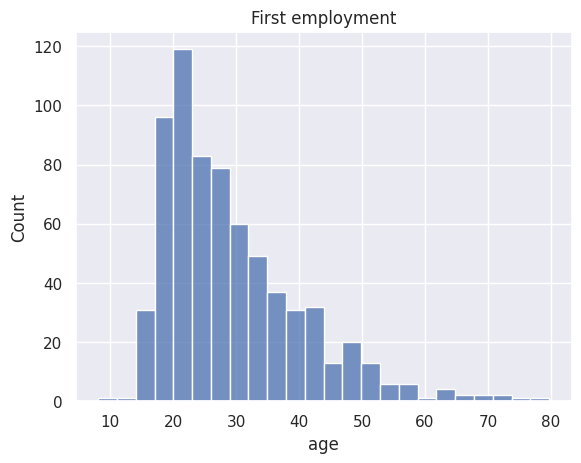

In [8]:
first_employment = df.Age - df.YearsEmployed
sns.histplot(first_employment)

print("Average age to start working at:", first_employment.mean())

plt.title("First employment");
plt.xlabel("age");

### Q1.6 

Let's try to analyze different features together. Build a [pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html) for columns from ['Age', 'Debt', 'YearsEmployed', 'CreditScore', 'Income'] with 'Approved' as a 'hue' argument. The hue argument adds a color marker to the plots and it will allow us to analyze how loan application approval relates to other features. Note, you can pass `kind='scatter', plot_kws=dict(alpha=0.2)` arguments to make the dots semi-transparent.

Which of the statements are true, if judged from the plot?
- (a) People over 40 years old have less debt than people under 40 years old
- (b) A credit application with low credit score is approved almost always
- (c) There is no clear dependence between debt and years employed
- (d) High income means high credit score

In [9]:
#Q1, Q3 =  df['Income'].quantile(0.25), df['Income'].quantile(0.75)
#IQR = Q3 - Q1

#upper = np.where(df['Income'] >= (Q3+1.5*IQR))

#lower = np.where(df['Income'] <= (Q1-1.5*IQR))
 
#df.drop(upper[0], inplace = True)
#df.drop(lower[0], inplace = True)

#sns.boxplot(df, x = 'Income');

#df.shape

(c)


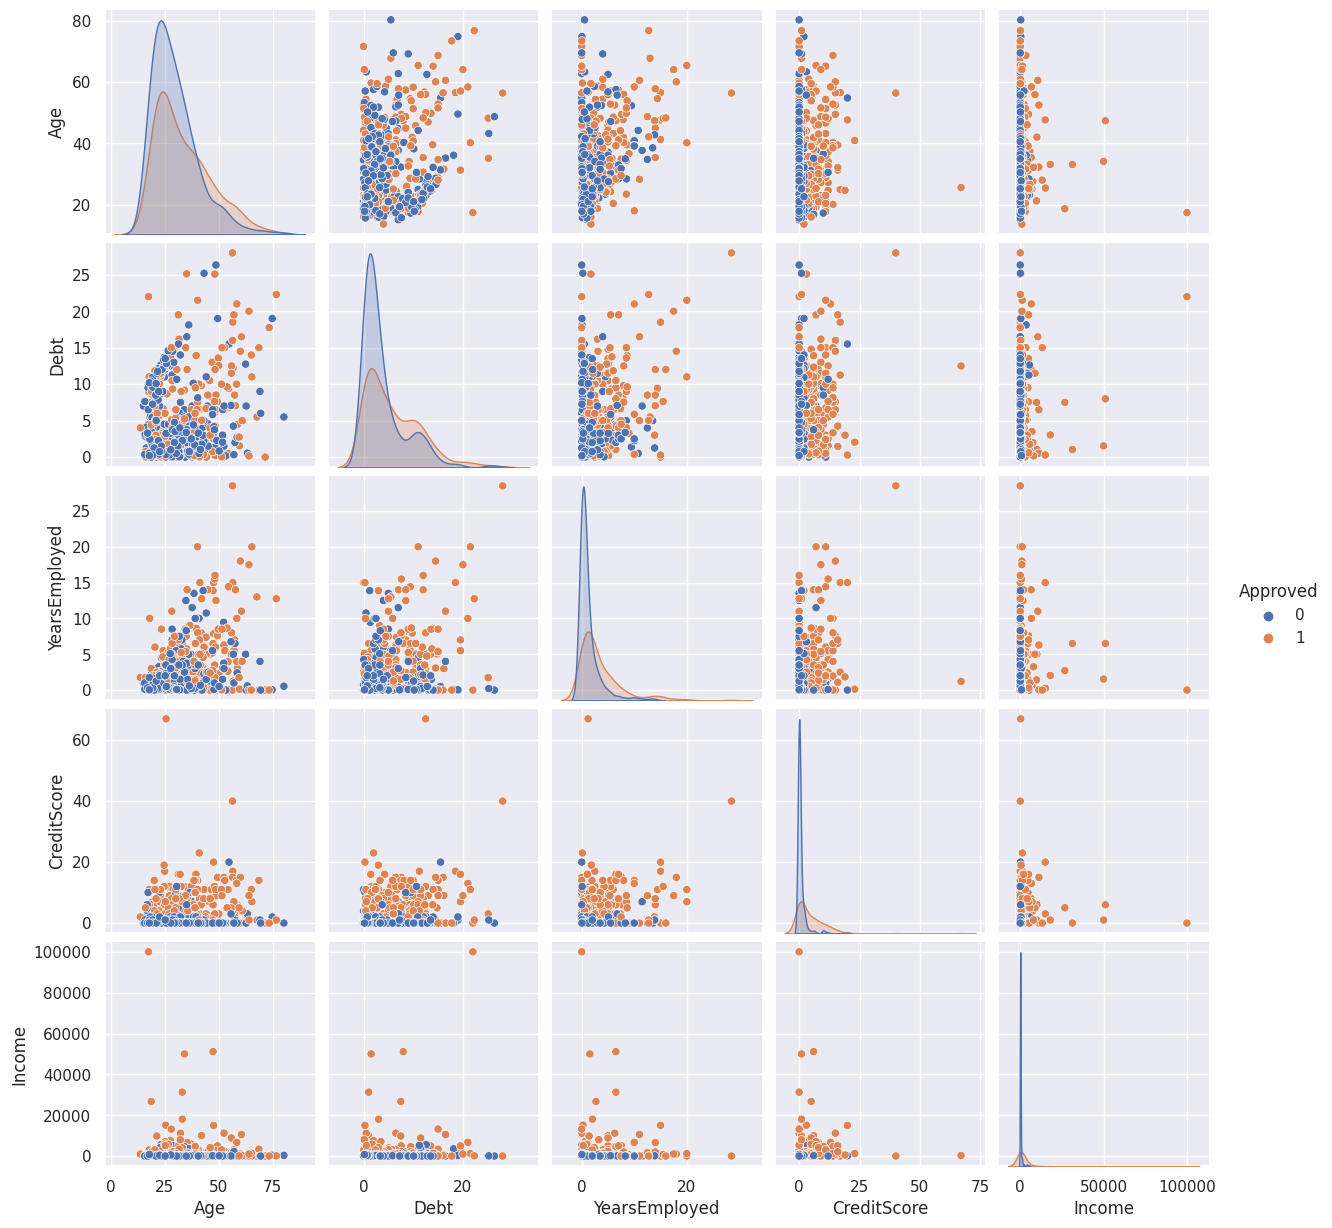

In [10]:
sns.pairplot(df, hue = 'Approved', vars = ['Age', 'Debt', 'YearsEmployed', 'CreditScore', 'Income']);
print("(c)")

### Q1.7

Build a [crosstab](https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html) for ethnicity and industry. How many Latino people are working in healthcare?

In [11]:
pd.crosstab(df.Industry, df.Ethnicity)

Ethnicity,Asian,Black,Latino,Other,White
Industry,,,,,
CommunicationServices,3,2,0,0,33
ConsumerDiscretionary,32,10,0,1,16
ConsumerStaples,2,2,0,0,50
Education,2,4,0,14,5
Energy,14,27,0,2,103
Financials,1,12,2,0,36
Healthcare,0,0,52,1,0
Industrials,1,7,0,0,56
InformationTechnology,1,17,1,0,22


In [12]:
print(52)

52


## 2. Preprocessing
The goal of the segment is to prepare data for further work

### Q2.1
There are two columns, that are exactly the same for all of the people. Let's drop one of them. As an answer, write the names of these columns divided by a comma.

In [13]:
print(df[df.BankRecord != df.BankCustomer].shape[0])
print('BankRecord, BankCustomer')

df.drop('BankRecord', axis = 1, inplace=True)

0
BankRecord, BankCustomer


### Q2.2

Now it's time to talk about the task for today. Our bank wants to predict whether the application for a loan is worthy or not. So we need to build a model that would predict it.

Let's divide the dataset into a target (the 'Approved' column) and data (the rest of the columns). How many positive labels are there in target?


In [14]:
y = df.Approved
X = df.drop('Approved', axis = 1)

print(y.sum())

307


### Q2.3

To honestly estimate the performance of the model, we need to split the dataset into train and test parts. In reality, a test could be millions of customers and a train could be a small playground to estimate the campaign. Our current dataset is not that big, so let's say the test would be just 30% of the dataset. Use `train_test_split` to make a split. Please set the `random_state` argument to 314 and don't forget to shuffle and stratify.
How many positive labels do you have in test targets?

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 314, stratify = y)

y_test.sum()

92

## 3. Basic models

Let's start with the most basic models. We going to use logistic regression, k neighbors classifier, and random forest without any modification or param tuning. This way we could be sure our future modification would indeed make the model stronger.

Some of the features are not usable in the current form as categorical, so let's make a copy of x with the following columns for the section:

'Gender', 'Age', 'Debt', 'Married', 'BankCustomer', 'InvestmentScore', 'YearsEmployed', 'PriorDefault', 'Employed', 'CreditScore', 'DriversLicense', 'ZipCode', 'Income'

In [16]:
columns = ['Gender', 'Age', 'Debt', 'Married', 'BankCustomer', 'InvestmentScore', 'YearsEmployed', 'PriorDefault', 'Employed', 'CreditScore', 'DriversLicense', 'ZipCode', 'Income']

X_train_sub, X_test_sub = X_train[columns], X_test[columns]

### Q3.1

Build a logistic regression model. Set max_iter parameter to 5000. What is the f1_score for the model?


In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

log_clf = LogisticRegression(max_iter=5000)
log_clf.fit(X_train_sub, y_train)
y_pred_log = log_clf.predict(X_test_sub)

print('f1_score of logistic regression classifier:', round(f1_score(y_test, y_pred_log), 3))

f1_score of logistic regression classifier: 0.862


### Q3.2

Build a k-neighbors classifier. What is the f1_score for the model?

In [18]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()

knn_clf.fit(X_train_sub, y_train)
y_pred_knn = knn_clf.predict(X_test_sub)

print('f1_score of k-neughbors classifier model:', round(f1_score(y_test, y_pred_knn), 3))

f1_score of k-neughbors classifier model: 0.613


### Q3.3

Build a random forest classifier with n_estimators = 5. What is the f1_score for the model?

In [19]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=5, random_state=42)

rf_clf.fit(X_train_sub, y_train)
y_pred_rf = rf_clf.predict(X_test_sub)

print('f1_score of logistic regression model:', round(f1_score(y_test, y_pred_rf), 3))

f1_score of logistic regression model: 0.842


### Q3.4

The models without fine-tuning are not as effective. First, let's try to regularize the regression with the L2 norm. Use 5-split cross-validation grid search to find the optimal C. You can use verbose argument of GridSearchCV in order to watch the progress of cross-validation. What is the f1 score for the model trained on the full train dataset with this regularization?

In [20]:
from sklearn.model_selection import GridSearchCV

grid_C = {
   'C' : np.logspace(-3, 3, 20),
}
gs = GridSearchCV(log_clf, param_grid=grid_C, verbose = 1)
gs.fit(X_train_sub, y_train)

log_clf = gs.best_estimator_
log_clf.fit(X_train_sub, y_train)
y_pred_log = log_clf.predict(X_test_sub)

print('Optimal "C" is:', round(gs.best_params_['C'], 3))
print("f1_score of logistic regression classifier with optimal C:", round(f1_score(y_test, y_pred_log), 3))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Optimal "C" is: 112.884
f1_score of logistic regression classifier with optimal C: 0.868


### Q3.5

Fine-tune a k-NN classifier, try to find an optimal number of neighbors, weights, and p with a 5-split cross-validation. What is the f1 score for a model trained on a full train dataset with these parameters?

In [21]:
grid_kNN = {
     'n_neighbors' : range(1, 20), 
     'weights' : ['uniform', 'distance'],
     'p' : range(1, 5)
}

gs = GridSearchCV(knn_clf, param_grid=grid_kNN, verbose=1)
gs.fit(X_train_sub, y_train)

knn_clf = gs.best_estimator_
knn_clf.fit(X_train_sub, y_train)
y_pred_knn = knn_clf.predict(X_test_sub)

print('Optimal parametors:', gs.best_params_)
print("f1_score of k-NN classifier with optimal parametors:", round(f1_score(y_test, y_pred_knn), 3))

Fitting 5 folds for each of 152 candidates, totalling 760 fits
Optimal parametors: {'n_neighbors': 16, 'p': 1, 'weights': 'distance'}
f1_score of k-NN classifier with optimal parametors: 0.679


### Q3.6

Use the 5-split CV to find the optimal number of estimators and max_features for the random forest. What is the f1 score for random forest trained on a full train dataset with these parameters?

In [22]:
grid_rf = {
    'n_estimators' : range(1, 10),
    'max_features' : ['sqrt', 'log2'] + list(range(1,18))
}

gs = GridSearchCV(rf_clf, param_grid=grid_rf, verbose=1)
gs.fit(X_train_sub, y_train)

rf_clf = gs.best_estimator_
rf_clf.fit(X_train_sub, y_train)
y_pred_rf = rf_clf.predict(X_test_sub)

print('Optimal parametors:', gs.best_params_)
print("f1_score of random forest classifier with optimal parametors:", round(f1_score(y_test, y_pred_rf), 3))

Fitting 5 folds for each of 171 candidates, totalling 855 fits
Optimal parametors: {'max_features': 2, 'n_estimators': 9}
f1_score of random forest classifier with optimal parametors: 0.869


## 4. Working with features

Machine learning is sometimes called data science because everything depends on data. In this section, we'll apply some of the most popular modifications for data. IMPORTANT: In the previous section we took a subset of the columns; now it's time to work with all of them.

### Q4.1

One of the standard procedures is data standardizations - it strongly influences the results of k-NN and make the convergence of other algorithms (i.e. logreg and neural nets) much faster. Let's apply `StandardScaler` for all the numerical columns - 'Age', 'Debt', 'YearsEmployed', 'InvestmentScore', 'CreditScore', 'ZipCode', 'Income'. 

What is the maximum value of Income now in the test set?

In [23]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()

num_columns = ['Age', 'Debt', 'YearsEmployed', 'InvestmentScore', 'CreditScore', 'ZipCode', 'Income']

std_scaler.fit(X[num_columns])
X_train[num_columns] = std_scaler.transform(X_train[num_columns])
X_test[num_columns] = std_scaler.transform(X_test[num_columns])

round(X_test["Income"].max(), 3)

1.07

### Q4.2
We have three categorical columns - 'Industry', 'Ethnicity' and 'Citizen'. We can't use them directly with our models, so let's use one-hot encoding - create a separate binary column for each possible value and drop the original 'Industry', 'Ethnicity' and 'Citizen' columns.

How many columns do we have now?

In [24]:
cat_columns = ['Industry', 'Ethnicity', 'Citizen']

X_train_dummies = pd.get_dummies(X_train[cat_columns])
X_test_dummies = pd.get_dummies(X_test[cat_columns])

X_train = pd.concat([X_train.drop(cat_columns, axis=1), X_train_dummies], axis=1)
X_test = pd.concat([X_test.drop(cat_columns, axis=1), X_test_dummies], axis=1)

### Q4.3

To check the effects of the modification, train the logistic regression with **updated** optimal C. What is the f1 score now?

In [25]:
grid_C = {
   'C' : np.logspace(-3, 3, 20),
}
gs = GridSearchCV(log_clf, param_grid=grid_C, verbose = 1)
gs.fit(X_train, y_train)

log_clf = gs.best_estimator_
log_clf.fit(X_train, y_train)
y_pred_log = log_clf.predict(X_test)

print('Optimal "C" is:', round(gs.best_params_['C'], 3))
print("f1_score of logistic regression classifier with optimal C:", round(f1_score(y_test, y_pred_log), 3))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Optimal "C" is: 6.158
f1_score of logistic regression classifier with optimal C: 0.883


### Q4.4

Another popular performance metric is the ROC curve. Train a k-NN and logistic regression with **updated** optimal params and build a roc-curve for both of them on the sample plot. What is the difference between them on FPR 0.7 (approximately)?

In [26]:
grid_kNN = {
     'n_neighbors' : range(1, 20),
     'weights' : ['uniform', 'distance'],
     'p' : range(1, 5)
}

gs = GridSearchCV(knn_clf, param_grid=grid_kNN, verbose=1)
gs.fit(X_train, y_train)

knn_clf = gs.best_estimator_
knn_clf.fit(X_train, y_train)
y_pred_knn = knn_clf.predict(X_test)

print('Optimal parametors:', gs.best_params_)
print("f1_score of k-NN classifier with optimal parametors:", round(f1_score(y_test, y_pred_knn), 3))

Fitting 5 folds for each of 152 candidates, totalling 760 fits
Optimal parametors: {'n_neighbors': 12, 'p': 1, 'weights': 'distance'}
f1_score of k-NN classifier with optimal parametors: 0.802


In [27]:
y_prob_log = log_clf.predict_proba(X_test)[:,1]
y_prob_knn = knn_clf.predict_proba(X_test)[:,1]

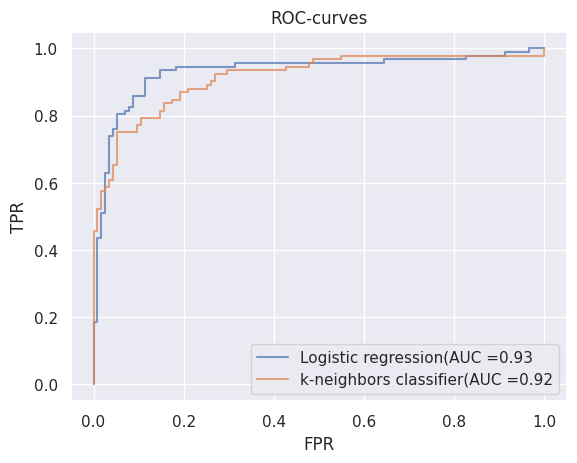

In [28]:
from turtle import color
from sklearn.metrics import roc_curve, roc_auc_score

fpr_log, tpr_log, _ = roc_curve(y_test, y_prob_log)
plt.step(fpr_log, tpr_log, where='post', alpha = 0.7, label = 'Logistic regression(AUC =' + str(round(roc_auc_score(y_test, y_prob_log), 2)))

fpr_knn, tpr_knn, _ = roc_curve(y_test, y_prob_knn)
plt.step(fpr_knn, tpr_knn, where='post', alpha = 0.7, label = 'k-neighbors classifier(AUC =' + str(round(roc_auc_score(y_test, y_prob_knn), 2)))

plt.xlabel('FPR');
plt.ylabel('TPR');
plt.legend();
plt.title('ROC-curves');

### Q5.1 (2 points)

Propose two derivative features and retrain one of the models with them. What is the performance?

In [29]:
X.head()

,Gender,Age,Debt,Married,BankCustomer,Industry,InvestmentScore,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income
0,1,30.83,0.000,1,1,Industrials,3.65,White,1.25,1,1,1,0,ByBirth,202,0
1,0,58.67,4.460,1,1,Materials,1.94,Black,3.04,1,1,6,0,ByBirth,43,560
2,0,24.50,0.500,1,1,Materials,8.15,Black,1.50,1,0,0,0,ByBirth,280,824
3,1,27.83,1.540,1,1,Industrials,7.99,White,3.75,1,1,5,1,ByBirth,100,3
4,1,20.17,5.625,1,1,Industrials,2.37,White,1.71,1,0,0,0,ByOtherMeans,120,0


In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 314, stratify = y)

X_train_dummies = pd.get_dummies(X_train[cat_columns])
X_test_dummies = pd.get_dummies(X_test[cat_columns])

X_train = pd.concat([X_train.drop(cat_columns, axis=1), X_train_dummies], axis=1)
X_test = pd.concat([X_test.drop(cat_columns, axis=1), X_test_dummies], axis=1)

X_train["HighIncome"] = X_train.Income > X.Income.median()
X_test["HighIncome"] = X_test.Income > X.Income.median()

X_train["NoDebt"] = X_train.Debt == 0
X_test["NoDebt"] = X_test.Debt == 0

std_scaler.fit(X[num_columns])
X_train[num_columns] = std_scaler.transform(X_train[num_columns])
X_test[num_columns] = std_scaler.transform(X_test[num_columns])

In [31]:
log_clf.fit(X_train, y_train)
y_pred_log = log_clf.predict(X_test)

print('f1_score of logistic regression classifier:', round(f1_score(y_test, y_pred_log), 3))

f1_score of logistic regression classifier: 0.889


### Q5.2

Train an xboost model with f1 score 0.8+

In [32]:
import xgboost as xgb

xgb_clf = xgb.XGBClassifier(learning_rate=0.3, n_estimators=41, objective = 'binary:logistic', max_depth = 5, n_jobs=-1, random_state=42)

xgb_clf.fit(X_train, y_train)

y_pred = xgb_clf.predict(X_test)
print('f1_score for xgboost classifier:', f1_score(y_test, y_pred))

f1_score for xgboost classifier: 0.8651685393258426
